# Loan Data Analysis

## by Praise Ekeopara

## Investigation Overview

Overall goal of presentation seeks to answer the following questions;

- What is the destribution of the Amount of Loan?
- What is the highest Loan Status recorded?
- What are the Possible Occupations of the borrowers?
- Which occupation type borrows the most?
- Are there correlations amongst features?
- What are the Income ranges based on number of Investors, Loan Amount and Borrower Rate?

### Key insights
1. It appears that the Loan amount is positively skewed and the most frequent loans are over 16,000 dollars
2. The **Current** loan status recorded the highest, followed by **Completed**.
3. The possible occupations of borrowers are; Professionals, Computer programmer, Excutive, Administrative assistant, Analyt etc.
4. It appears that amongst the top 10 borrowers' occupations, four occupation namely; `Analyst`, `Attorney`, `Car Dealer`, and `Chemist`, happen to borrow loans of 35,000.
5. There appears a positive correlation between the LP customer principal payment and the Investors. This can suggest that as more investors invest in the company, more possible customer principal payments will be made. This is true because more invests will ensure more loans to be available
6. Majority of Income ranges dominating the Investors vs Borrower rates are 50,000-74,999, 100,000+ and with little of 25,000-49,999.


## Dataset Overview

> This data set contains `113,937 loans` with `81 variables` on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
The [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. 
However, the focus of the exploration will be about about 10-15 of these variables or features in the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv') 

# select data of interest
loan = loan_data[['ListingKey', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'Occupation', 'EmploymentStatus', 
                  'IncomeRange', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors', 'LP_CustomerPayments',
                  'LP_CustomerPrincipalPayments', 'LP_InterestandFees']]

loan = loan.drop('ClosedDate', axis=1) # dropping the 'ClosedDate' feature
loan.dropna(axis=0, inplace=True);

loan = loan.drop_duplicates(keep='first', subset='ListingKey')
loan = loan.drop('ListingKey', axis=1) # dropping the 'ListingKey' feature

#Using drop() to delete rows based on column value
income_drop = ['Not employed', '$0']
loan.drop(loan[loan['EmploymentStatus'] == 'Not available'].index, inplace = True)
for val in income_drop:
    loan.drop(loan[loan['IncomeRange'] == val].index, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the destribution of the Amount of Loan?

- It appears that the Loan amount is positively skewed (skewed to the right)
- Most frequent loans are over 16,000 dollars
- The highest loan appears to be $35,000

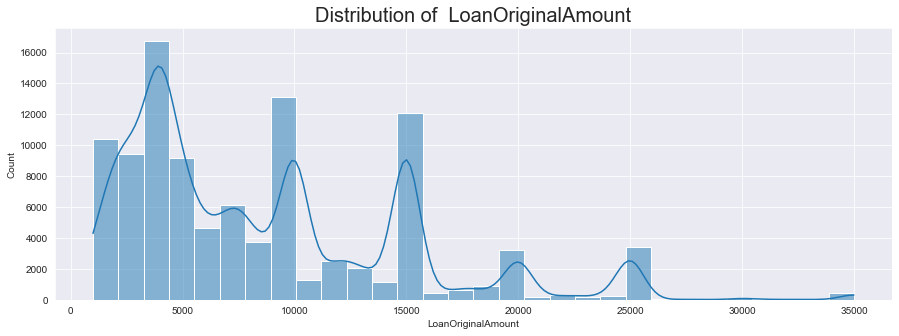

In [3]:
def histoplot(data, x):
    plt.figure(figsize = (15, 5), facecolor = None)
    sns.set_style("darkgrid")
    plt.title("Distribution of " + " " + x, fontsize=20)
    sns.histplot(data=data, bins=30, x=x, kde=True);
    
histoplot(loan, "LoanOriginalAmount")

## What is the highest Loan Status recorded?

- The **Current** loan status recorded the highest, followed by **Completed**.

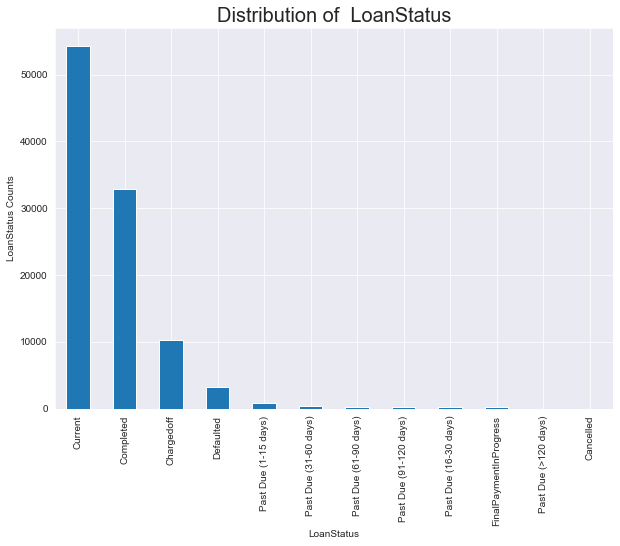

In [4]:
def count_plot(data, x, kind, figsize):
    plt.figure(figsize = figsize, facecolor = None)
    plt.title("Distribution of " + " " + x, fontsize=20)
    sns.set_style("darkgrid")
    if kind == 'barh':
        plt.xlabel(x + " " + 'Counts')
        plt.ylabel(x)
    else:
        plt.ylabel(x + " " + 'Counts')
        plt.xlabel(x)
    data[x].value_counts().plot(kind=kind);

count_plot(loan, 'LoanStatus', 'bar', (10, 7))

## What are the Possible Occupations of the borrowers?

As can be seen, the possible occupations of borrowers are; 
  - Professionals
  - Computer programmer
  - Excutive
  - Administrative assistant
  - Analyt etc.

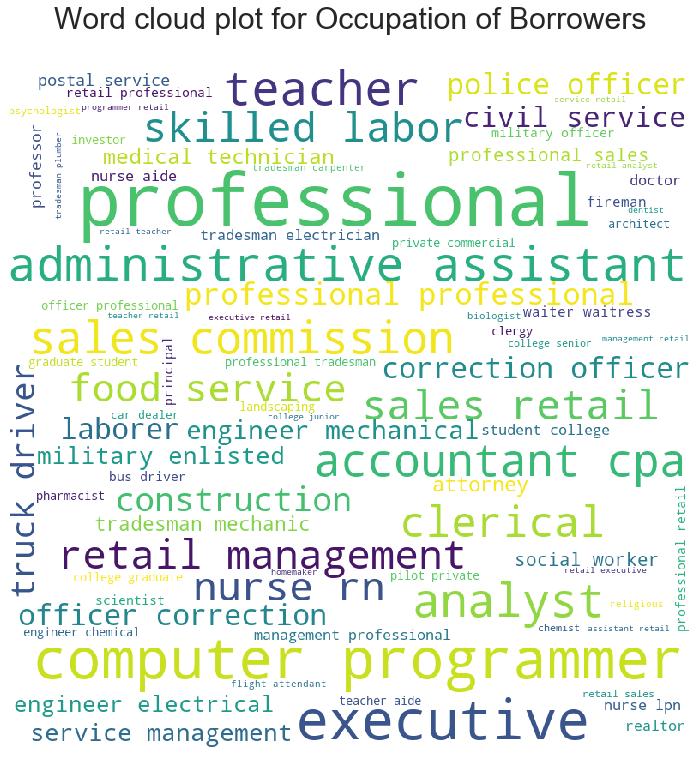

In [5]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in loan.Occupation:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud plot for Occupation of Borrowers\n", fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Which occupation type borrows the most?

- It appears that amongst the top 10 borrowers' occupations, four occupation namely; `Analyst`, `Attorney`, `Car Dealer`, and `Chemist`, happen to borrow loans of $35,000.

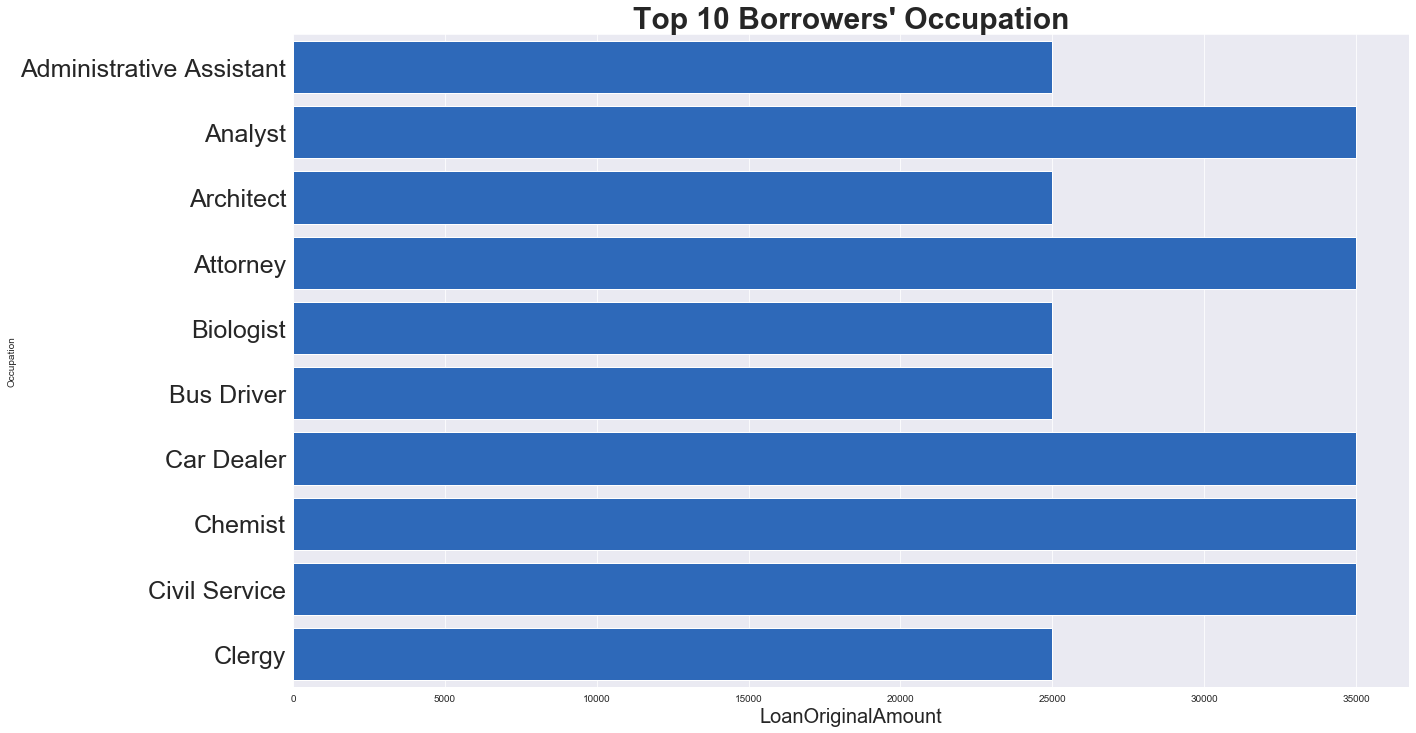

In [6]:
def top10_barplot(data, feature):
    plt.figure(figsize=(20, 12))
    loanSum_df = loan.groupby(feature)['LoanOriginalAmount'].max()[1:11].reset_index()
    ax = sns.barplot(data=loanSum_df, y=feature, x='LoanOriginalAmount', color='#1765D0')
    plt.xlabel('LoanOriginalAmount', fontsize=20)
    ax.set_title(f'Top 10 Borrowers\' {feature}', fontweight='bold', fontsize=30)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25);
                 
top10_barplot(loan, 'Occupation')

## Are there correlations amongst features?

- There appears a positive correlation between the LP customer principal payment and the Investors. This can suggest that as more investors invest in the company, more possible customer principal payments will be made. This is true because more invests will ensure more loans to be available.
- With correlation value of 0.018, it appears that irrespective of the number of Terms for borrowing loan, there's little to no impact on the borrower's rate
- With a relationship score of -0.35, borrower's annual rate will slightly decrease with an increase in Loan amount.
- With a high positive correlation between Monthly loan payment and the Loan amount shows that as monthly amounts are paid, more loans will be available for borrowing.
- There are multicollinearity observations between specific features such as; LP_CustomerPayments and LP_CustomerPrincipalPayments, BorrBorrowerAPR and BorrowerRate.

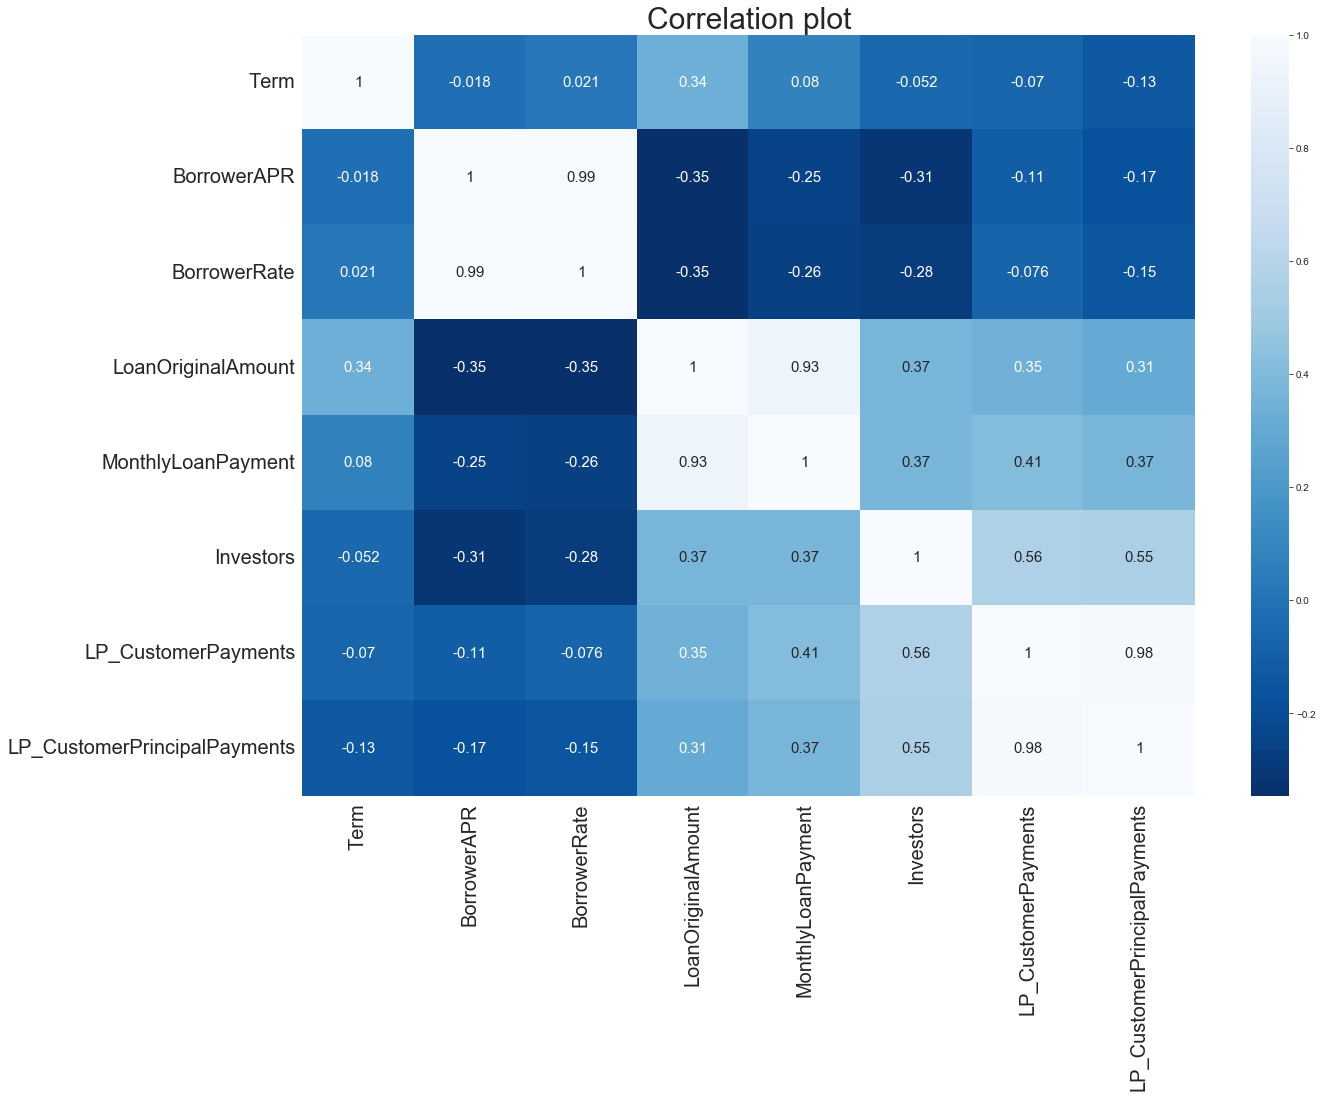

In [7]:
# make a correlation plot (heatmap)
corr_mx = loan.iloc[:,:-1].corr()
f, ax = plt.subplots(figsize=(20,14)) 
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='Blues_r')
plt.title("Correlation plot", fontsize=30)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20);
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20);

## What are the Income ranges based on number of Investors, Loan Amount and Borrower Rate?

- Majority of Income ranges dominating the Investors vs Borrower rates are $50,000-74,999, 100,000+ and with little of 25,000-49,999.
- For the loan amounts vs Investors, 100,000+ and 50,000-74,999 dominate the relationship.

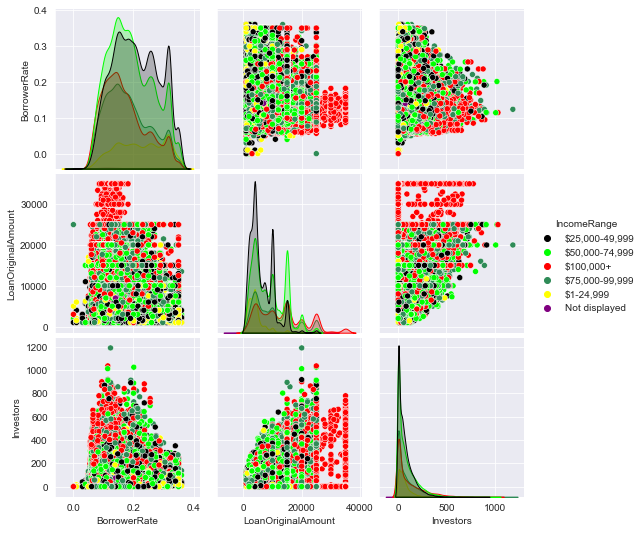

In [8]:
sns.pairplot(loan, vars=['BorrowerRate', 'LoanOriginalAmount', 'Investors'], 
             hue = 'IncomeRange', palette = ['black','lime', 'red', "seagreen",  "yellow", "purple"]);